# Statement 5 
## Train a DNN on the Forest Fire dataset using RMSprop optimizer with a learning rate of 0.01. Report 
## training and validation accuracy

In [54]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_curve, auc, precision_recall_curve, 
                           average_precision_score, accuracy_score,
                           precision_score, recall_score, f1_score)

Found 1467 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Found 68 images belonging to 2 classes.
Class indices: {'fire': 0, 'nofire': 1}
Training samples: 1467
Validation samples: 365
Test samples: 68


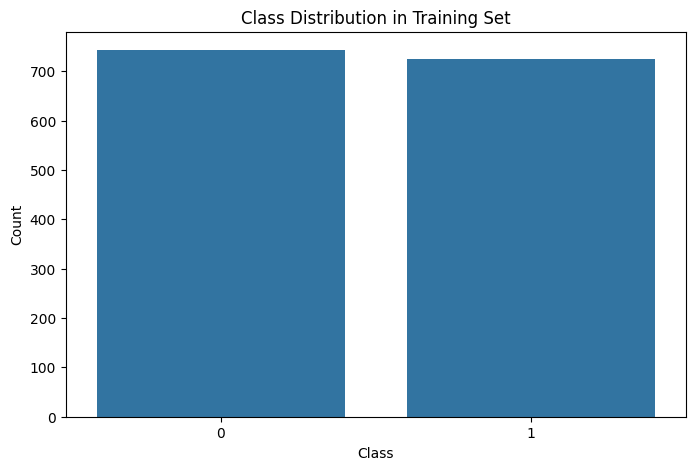

In [44]:
# 1. Data Loading and EDA
train_dir = 'DL_LAB_EXAM/Datasets/forest_fire/Training and Validation'
test_dir = 'DL_LAB_EXAM/Datasets/forest_fire/Testing'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# EDA
print("Class indices:", train_generator.class_indices)
print("Training samples:", train_generator.samples)
print("Validation samples:", val_generator.samples)
print("Test samples:", test_generator.samples)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=train_generator.classes)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [52]:
# 2. Model Building and Training
model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=RMSprop(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=30
)

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 501ms/step - accuracy: 0.6384 - loss: 1172.0598 - val_accuracy: 0.7188 - val_loss: 0.6422
Epoch 2/30
 1/45 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.5312 - loss: 3.5070

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5312 - loss: 3.5070 - val_accuracy: 0.5057 - val_loss: 0.5847
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 474ms/step - accuracy: 0.6688 - loss: 3.0804 - val_accuracy: 0.6960 - val_loss: 0.9978
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6875 - loss: 2.0725 - val_accuracy: 0.5256 - val_loss: 0.6793
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.6599 - loss: 2.7778 - val_accuracy: 0.7017 - val_loss: 0.5590
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6562 - loss: 0.8093 - val_accuracy: 0.6307 - val_loss: 0.6209
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.7547 - loss: 1.5853 - val_accuracy: 0.6250 - val_loss: 0.5998
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6562 - loss: 0.4501 - val_accuracy: 0.5511 - val_loss: 2.5318
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.7201 - loss: 1.8221 - val_accuracy: 0.5028 - val_

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step 
Classification Report:
               precision    recall  f1-score   support

     No Fire       0.25      0.09      0.13        22
        Fire       0.67      0.87      0.75        46

    accuracy                           0.62        68
   macro avg       0.46      0.48      0.44        68
weighted avg       0.53      0.62      0.55        68



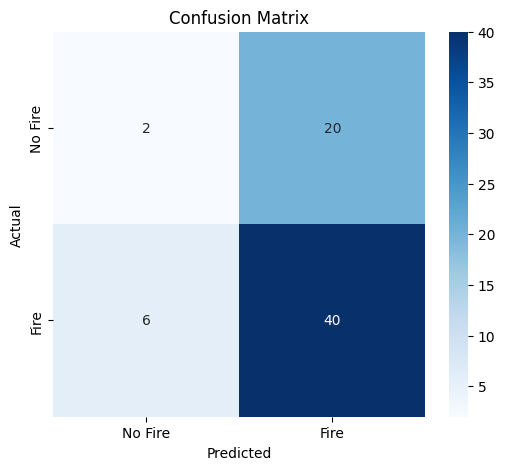

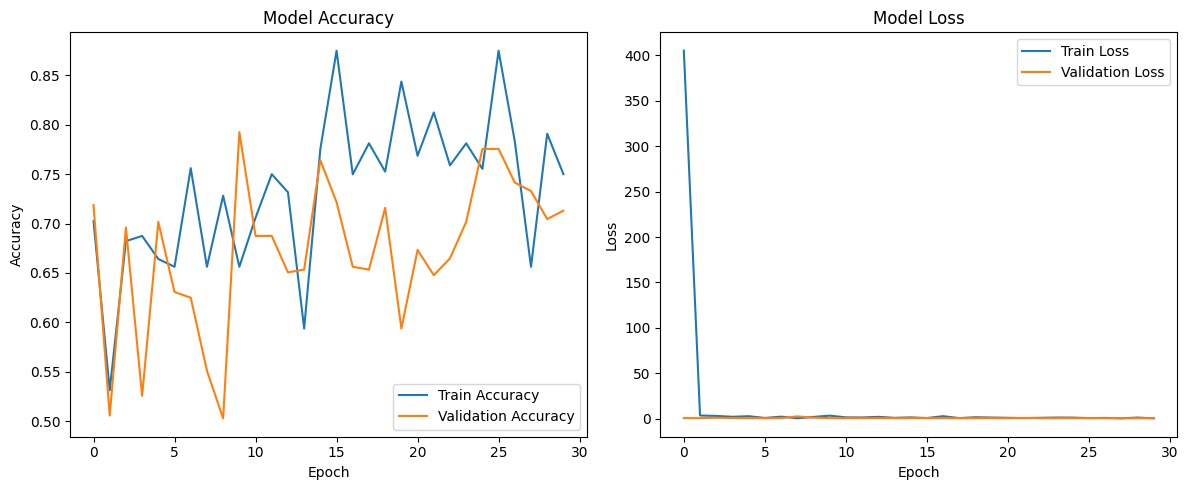

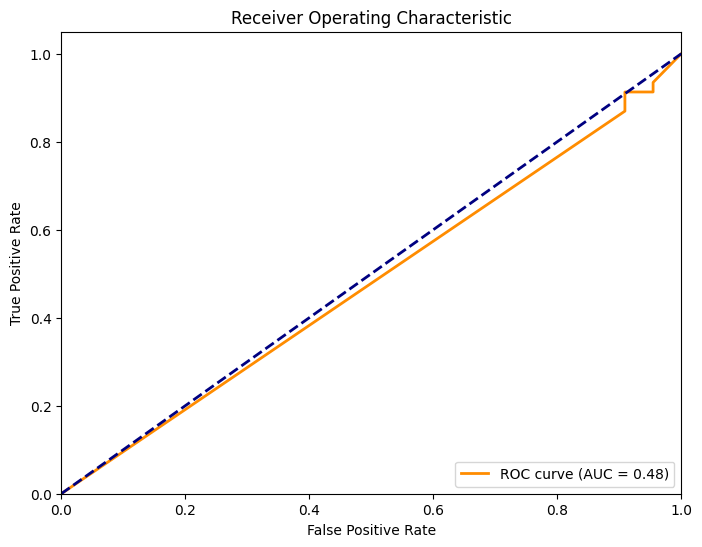

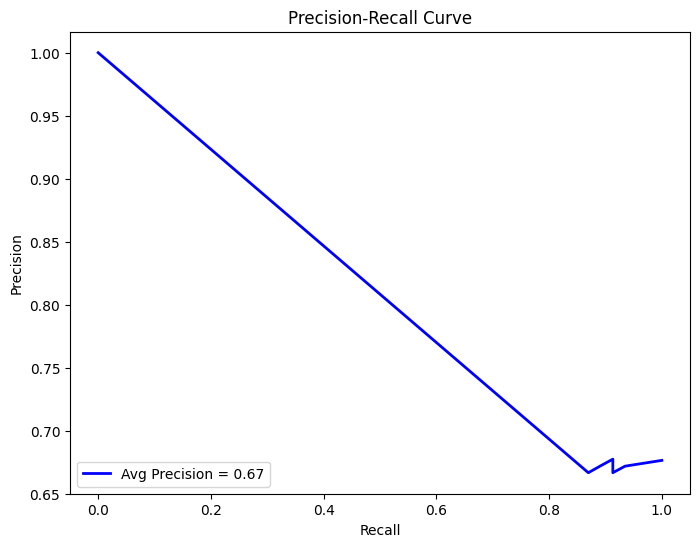

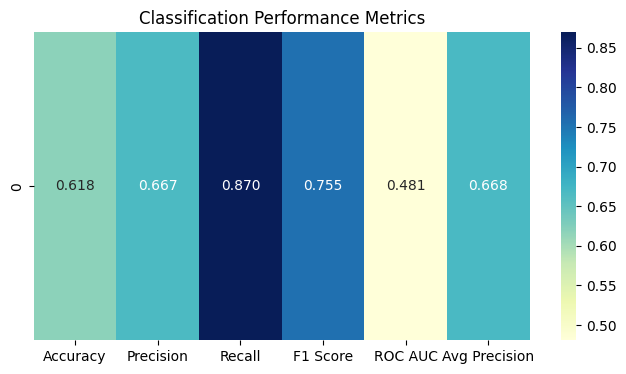


Final Evaluation Metrics:
Test Accuracy: 0.6176
Precision: 0.6667
Recall: 0.8696
F1 Score: 0.7547
ROC AUC: 0.4807
Average Precision: 0.6678


In [56]:
# Get predictions
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['No Fire', 'Fire']))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fire', 'Fire'], 
            yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy and Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
avg_precision = average_precision_score(y_true, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Metrics Table
metrics = {
    'Accuracy': accuracy_score(y_true, y_pred),
    'Precision': precision_score(y_true, y_pred),
    'Recall': recall_score(y_true, y_pred),
    'F1 Score': f1_score(y_true, y_pred),
    'ROC AUC': roc_auc,
    'Avg Precision': avg_precision
}

# Create DataFrame and ensure numeric values
metrics_df = pd.DataFrame([metrics]).apply(pd.to_numeric)

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Classification Performance Metrics')
plt.show()

# Print final metrics
print("\nFinal Evaluation Metrics:")
print(f"Test Accuracy: {metrics['Accuracy']:.4f}")
print(f"Precision: {metrics['Precision']:.4f}")
print(f"Recall: {metrics['Recall']:.4f}")
print(f"F1 Score: {metrics['F1 Score']:.4f}")
print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
print(f"Average Precision: {metrics['Avg Precision']:.4f}")